In [5]:
# some interesting ideas from chatGPT. Doesn't work though.

import geopandas as gpd
from shapely.geometry import box
import re

# file = "test.dat"
file = "day.dat"
lines = open(file,'r').read().split('\n') 
instructions = [(match.group(1), int(match.group(2)), match.group(3)) 
          for l in lines if (match := re.match(r'(.) (.*) (.*)', l))]
len(instructions)


664

In [6]:

def create_trench_box(x, y, direction, amount):
    """Create a box representing the trench for each movement."""
    if direction == 'U':
        trench = box(x, y, x + 1, y + amount + 1)
        y += amount
    elif direction == 'D':
        trench = box(x, y - amount, x + 1, y + 1)
        y -= amount
    elif direction == 'L':
        trench = box(x - amount, y, x + 1, y + 1)
        x -= amount
    else:  # 'R'
        trench = box(x, y, x + amount + 1, y + 1)
        x += amount
    return trench, x, y

# Initialize starting point
x, y = 0, 0
trenches = []
trenches.append(box(x, y, x + 1, y + 1))  # Add starting point to trenches

# Create trench boxes for each instruction
for direction, amount, color in instructions:
    trench, x, y = create_trench_box(x, y, direction, amount)
    trenches.append(trench)

# Combine trenches into a GeoDataFrame
gdf = gpd.GeoDataFrame(geometry=trenches)
trench_polygon = gdf.unary_union  # Combine all trenches into a single polygon

# Calculate the trench area
trench_area = trench_polygon.area

# Calculate the full area including the interior
full_area = trench_polygon.convex_hull.area

trench_area, full_area


(3792.0, 89564.5)

In [7]:
-1 * (45159.0 - full_area)

44405.5

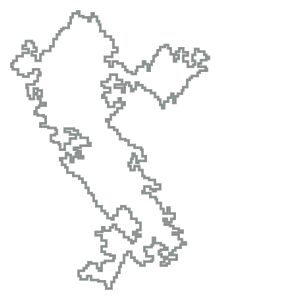

In [8]:
trench_polygon